In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./course-data/Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


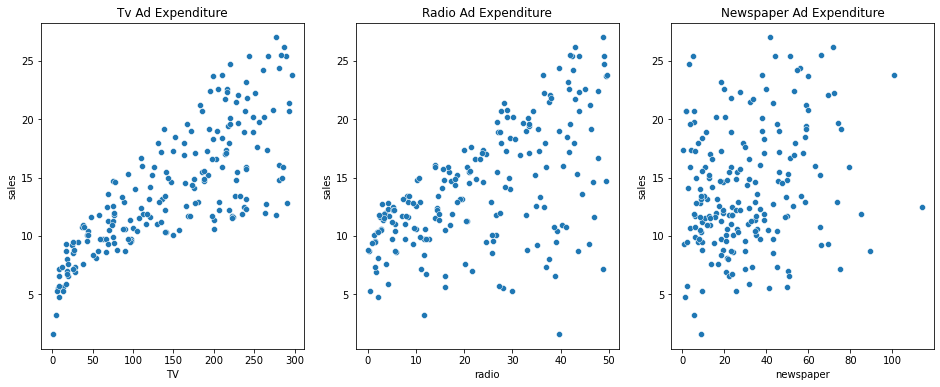

In [4]:
# First, explore visually

fig,axes = plt.subplots(nrows=1, ncols=3,figsize=(16,6))

for i, column in enumerate(df.drop('sales', axis=1)):
    sns.scatterplot(data=df, x=column, y='sales', ax=axes[i])
    axes[i].set_title(f'{column.capitalize()} Ad Expenditure') 

# for i in range(len(axes)): 
#     print(i)
#     axes[i] = sns.scatterplot(data=df, x=df.iloc[:,i], y=df['sales'])

# for ax in df.drop('sales',axis=1):
#     sns.scatterplot()

# note that TV and Radio Spend do have some kind of positive correlation: as we increase TV and Radio Ad Expenditure, sales are more likely to go up 

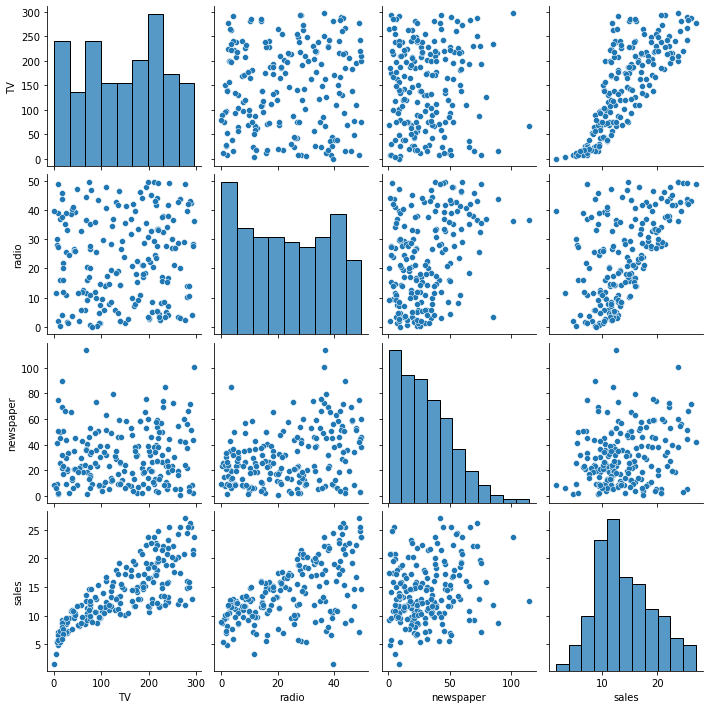

In [39]:
sns.pairplot(df)
# this also show the relatioship between each feature -> important for Polynomial Regression -> there might be a synergy between running both radio ads and newspaper ads

In [6]:
X = df.drop('sales',axis=1)
# note that for more complex algorithms we may do some pre-processing to the data, e.g. standardizing, normalizing, etc. 

In [7]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [8]:
y = df['sales']

In [9]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
# help(train_test_split)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
X_train.head()

,TV,radio,newspaper
42,293.6,27.7,1.8
189,18.7,12.1,23.4
90,134.3,4.9,9.3
136,25.6,39.0,9.3
51,100.4,9.6,3.6


In [14]:
len(X_train)

134

In [15]:
len(X)*2/3

133.33333333333334

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
# help(LinearRegression)^
# call to explore the hyper-parameters of the model 

In [18]:
model = LinearRegression()
# when first using a model, use the default parameters to check its baseline performance

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
pred = model.predict(X_test)
pred

array([16.58673085, 21.18622524, 21.66752973, 10.81086512, 22.25210881,
       13.31459455, 21.23875284,  7.38400509, 13.43971113, 15.19445383,
        9.01548612,  6.56945204, 14.4156926 ,  8.93560138,  9.56335776,
       12.10760805,  8.86091137, 16.25163621, 10.31036304, 18.83571624,
       19.81058732, 13.67550716, 12.45182294, 21.58072583,  7.67409148,
        5.67090757, 20.95448184, 11.89301758,  9.13043149,  8.49435255,
       12.32217788,  9.99097553, 21.71995241, 12.64869606, 18.25348116,
       20.17390876, 14.20864218, 21.02816483, 10.91608737,  4.42671034,
        9.59359543, 12.53133363, 10.14637196,  8.1294087 , 13.32973122,
        5.27563699,  9.30534511, 14.15272317,  8.75979349, 11.67053724,
       15.66273733, 11.75350353, 13.21744723, 11.06273296,  6.41769181,
        9.84865789,  9.45756213, 24.32601732,  7.68903682, 12.30794356,
       17.57952015, 15.27952025, 11.45659815, 11.12311877, 16.60003773,
        6.90611478])

In [21]:
f'MAE = {(y_test-pred).abs().mean():.2f}'
# performance evaluation: how can we evaluate quantitatively the error in a regression task -> we can to evaluate the fit of a regression algorithm

'MAE = 1.49'

In [22]:
f'MSE = {((y_test-pred)**2).mean():.2f}'

'MSE = 3.73'

In [23]:
f'RMSE = {np.sqrt((y_test-pred)**2).mean():.2f}'

'RMSE = 1.49'

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
df['sales'].mean()

14.0225

<AxesSubplot:xlabel='sales', ylabel='Count'>

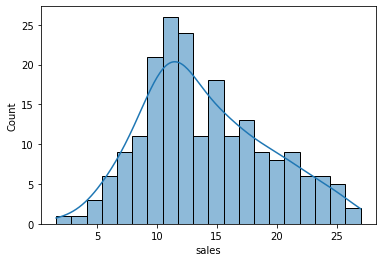

In [26]:
sns.histplot(data=df, x='sales', bins=20,kde=True)

In [27]:
mean_absolute_error(y_test,pred)
# context is everythigng: did we already have a historical model that tried to predict sales based on features? -> comapre the MAEs
# how can we judge this in terms of just my data? Consider the average sales value and the distribution of sales values -> average is 14, distribution goes form 5 to 25
# on average we're off by 1.4 which translates to 1.4=10%*14 -> a 10% error range

1.4937750024728969

In [28]:
f"{df['sales'].mean()/mean_absolute_error(y_test,pred):.2f}% error range for MAE -> my prediction is on average off by about 9%"
# is this error acceptable? -> depends on the context of the situation -> my prediction is on average off by about 10%
# problem: does consider the situation where the model is really far off only for only a few poitns

'9.39% error range for MAE -> my prediction is on average off by about 9%'

In [29]:
mean_squared_error(y_test,pred)
# punishes values that are really off
# problem: cannot be interpreted

3.7279283306815096

In [30]:
# RMSE
rmse= np.sqrt(mean_squared_error(y_test,pred))
rmse
# analogy: standard deviation of your predictions and the MSE can be thought of as the variance of our predictions  

1.9307843822347202

In [31]:
f"{df['sales'].mean()/rmse:.2f}% error range for RMSE -> my prediction is on average off by about 7%"

'7.26% error range for RMSE -> my prediction is on average off by about 7%'

In [32]:
# it is recommended to use both the MAE & RMSE -> check to see if on average we're doing good & make sure the prediction is not far off for some data poinst

In [33]:
residuals = (y_test-pred)

In [62]:
residuals.head()

95     0.313269
15     1.213775
30    -0.267530
158   -3.510865
128    2.447891
Name: sales, dtype: float64

In [42]:
residuals.describe()

count    66.000000
mean     -0.191640
std       1.935973
min      -6.017447
25%      -1.457744
50%       0.290968
75%       1.183827
max       2.982308
Name: sales, dtype: float64

<AxesSubplot:xlabel='sales', ylabel='Count'>

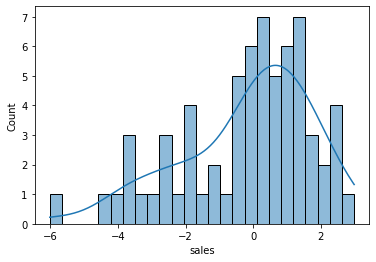

In [55]:
sns.histplot(data=residuals, kde=True,bins=25)

# the mean should be close to zero for the KDE
# here we overshoot the zero and the curve is skewed one way, but not by much

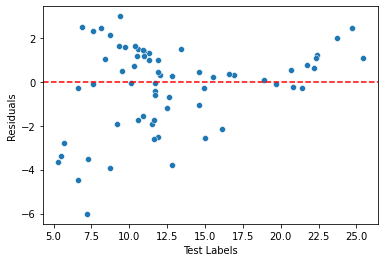

In [54]:
ax = sns.scatterplot(x=y_test, y=residuals)
ax.set(ylabel='Residuals', xlabel='Test Labels')
plt.axhline(y=0,color='red',linestyle='--')

# there should be no clear pattern / curve in the plot

In [50]:
# sns.regplot(x=y_test, y=residuals)

In [57]:
import scipy as sp

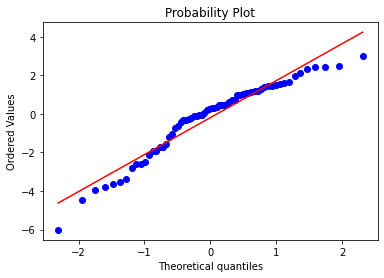

In [61]:
# Create a figure and axis to plot on
fig, ax = plt.subplots()

# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
sp.stats.probplot(residuals,plot=ax);

In [ ]:
# Create a figure and axis to plot on
# fig, ax = plt.subplots(figsize=(6,8),dpi=100)

# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
# _ = sp.stats.probplot(test_res,plot=ax)
# alternative: sp.stats.probplot(residuals,plot=ax);

In [63]:
final_model = LinearRegression()

In [64]:
final_model.fit(X,y)
# we fit the final model on all the data since we've decided that these model hyperparameters are good enough on a test set, so when deployed to the real world, we want to take full advantage of the entire data set

LinearRegression()

In [65]:
final_model.coef_
# beta coefficients; they come in the same order as the feature data frame we passed in 

array([ 0.04576465,  0.18853002, -0.00103749])

In [68]:
coef_df = pd.DataFrame(data=final_model.coef_,index=X.columns,columns=['B_Coeff'])
coef_df

# note that the coefficient for newspaper expenditure is almost zero -> in term of the linear regression model this means regardless what we spend on newspaper ads the models thinks it doesn't even matter and it gives it a weight of zero thus cancelling out any value you spend on newspaper ads. In fact this is going to lower your sales, since it's a negative number

# the model thinks radio expenditures has a greater effect than TV expenditures

# for B_TV = 0.05 -> if we were to hold the other features fixed and only adjust TV, for a one unit increase in TV expenditure we expect a 0.05 increase in sales

,B_Coeff
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [69]:
y_hat = final_model.predict(X)

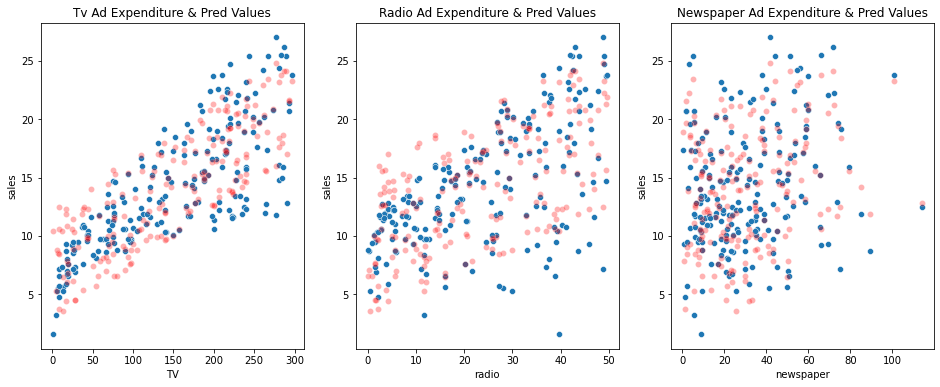

In [76]:
# this plot is rather unreliable the more features we have

fig,axes = plt.subplots(nrows=1, ncols=3,figsize=(16,6))

for i, column in enumerate(df.drop('sales', axis=1)):
    sns.scatterplot(data=df, x=column, y='sales', ax=axes[i])
    sns.scatterplot(data=df, x=column, y=y_hat, ax=axes[i],color='red',alpha=0.3)
    axes[i].set_title(f'{column.capitalize()} Ad Expenditure & Pred Values') 

In [ ]:
# alternative

# fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))
# 
# axes[0].plot(df['TV'],df['sales'],'o')
# axes[0].plot(df['TV'],y_hat,'o',color='red')
# axes[0].set_ylabel("Sales")
# axes[0].set_title("TV Spend")
# 
# axes[1].plot(df['radio'],df['sales'],'o')
# axes[1].plot(df['radio'],y_hat,'o',color='red')
# axes[1].set_title("Radio Spend")
# axes[1].set_ylabel("Sales")
# 
# axes[2].plot(df['newspaper'],df['sales'],'o')
# axes[2].plot(df['radio'],y_hat,'o',color='red')
# axes[2].set_title("Newspaper Spend");
# axes[2].set_ylabel("Sales")
# plt.tight_layout();

In [77]:
from joblib import dump, load

In [78]:
dump(final_model, 'final-sales-model.joblib')

['final-sales-model.joblib']

In [82]:
loaded_model = load('./final-sales-model.joblib')

In [83]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [84]:
# We predict the sale values for a new campaign

X.shape

(200, 3)

In [85]:
# 149 TV, 22 Radio, 12 Newspaper
# Sales?
campaign = [[149,22,12]]

In [87]:
loaded_model.predict(campaign)

# the model will run with a MAE of 1.21 and a RMSE of 1.52 -> we can assume a similar performance on new data, as long as the new data is more or less in the range of existing data

array([13.893032])